# Bars plots

Now that we have an understanding of the core components of plots and some basic plot types, let's dive more deeply into bar plots and the ways we can customize them, in particular, how we can make stacked and grouped bar plots. To begin with, let's create some data that we'll plot for this exercise that shows the output of grain, wheat and barley in tons, for three different farms.

In [2]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "Farm A": [50, 75, 36],
    "Farm B": [15, 98, 33],
    "Farm C": [0, 20, 77],
}
columns = ["Grain", "Wheat", "Barley"]

farm_data = pd.DataFrame.from_dict(data, orient="index", columns=columns)
farm_data

,Grain,Wheat,Barley
Farm A,50,75,36
Farm B,15,98,33
Farm C,0,20,77


### Standard bar plots

We can make bar plots in one of two directions: vertical or horizontal. We've already seen vertical bar plots, but lets revisit those by looking at the total grain, wheat, and barley output across the three farms.

In [3]:
total = farm_data.sum()
total

Grain      65
Wheat     193
Barley    146
dtype: int64

Text(0, 0.5, 'Quantity (Tons)')

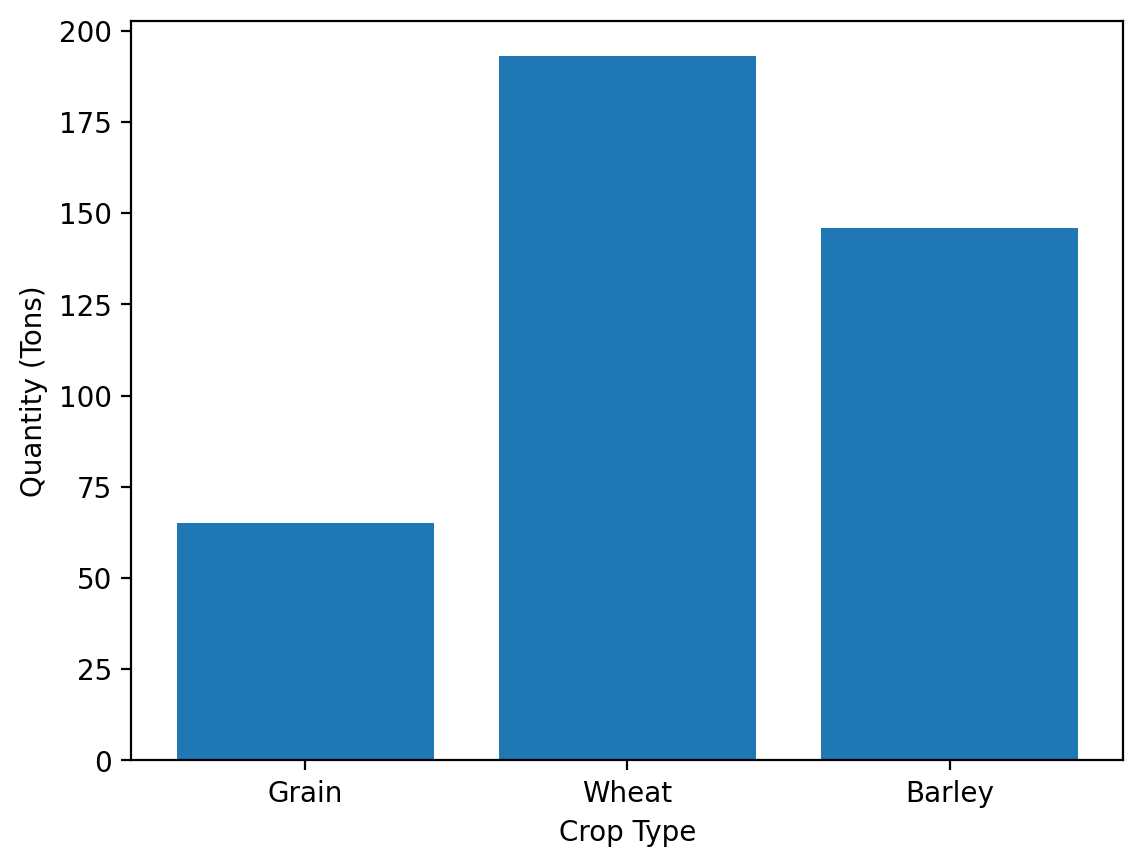

In [4]:
fig, ax = plt.subplots()

ax.bar(total.index, height=total.values)
ax.set_xlabel("Crop Type")
ax.set_ylabel("Quantity (Tons)")

Creating a horizontal bar plot instead is trivial using the `barh` command which just swaps the x and y axis.

Text(0, 0.5, 'Crop Type')

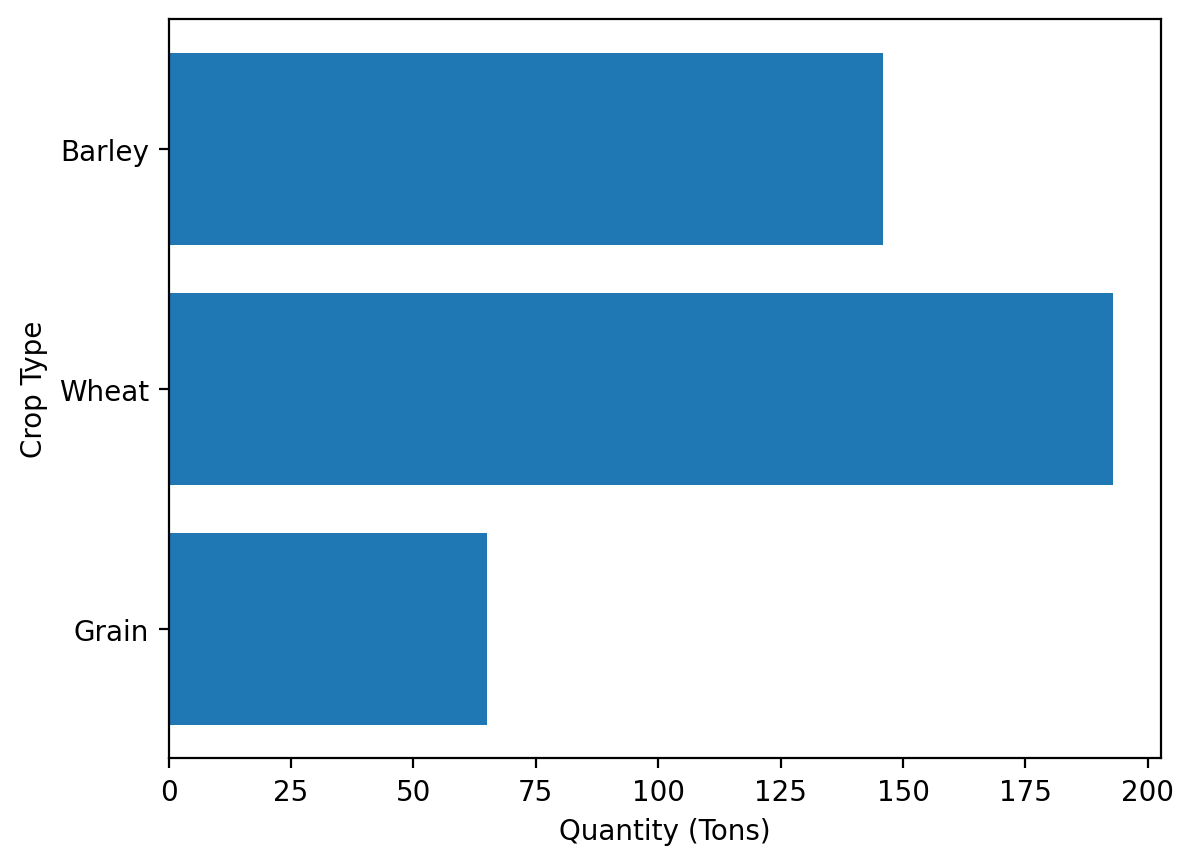

In [5]:
fig, ax = plt.subplots()

ax.barh(total.index, width=total.values)
ax.set_xlabel("Quantity (Tons)")
ax.set_ylabel("Crop Type")

'''{note}
Bar plots should ALWAYS have their base at 0. If this isn't the case, they can be misleading to the reader.
'''

### Stacked bar plots

Where this gets more interesting is when we want to create stacked bar plots. Each bar that's plotted is actually a rectangle and so it has a baseline which is 0 in standard bar plots. However, we can adjust that baseline through the `bottom` keyword parameter and that becomes the starting point for the bar. Let's set a different baseline for plotting the grain, wheat, and barley totals to show how that would look. You'll notice that the length of the bar plot remains the same, the value of the baseline has just been added to it. For example, for wheat, 50 was added to the plotted value of 193 which means the top of the bar was 243 - very close to 250 as is visible in the plot below:

Text(0, 0.5, 'Quantity (Tons)')

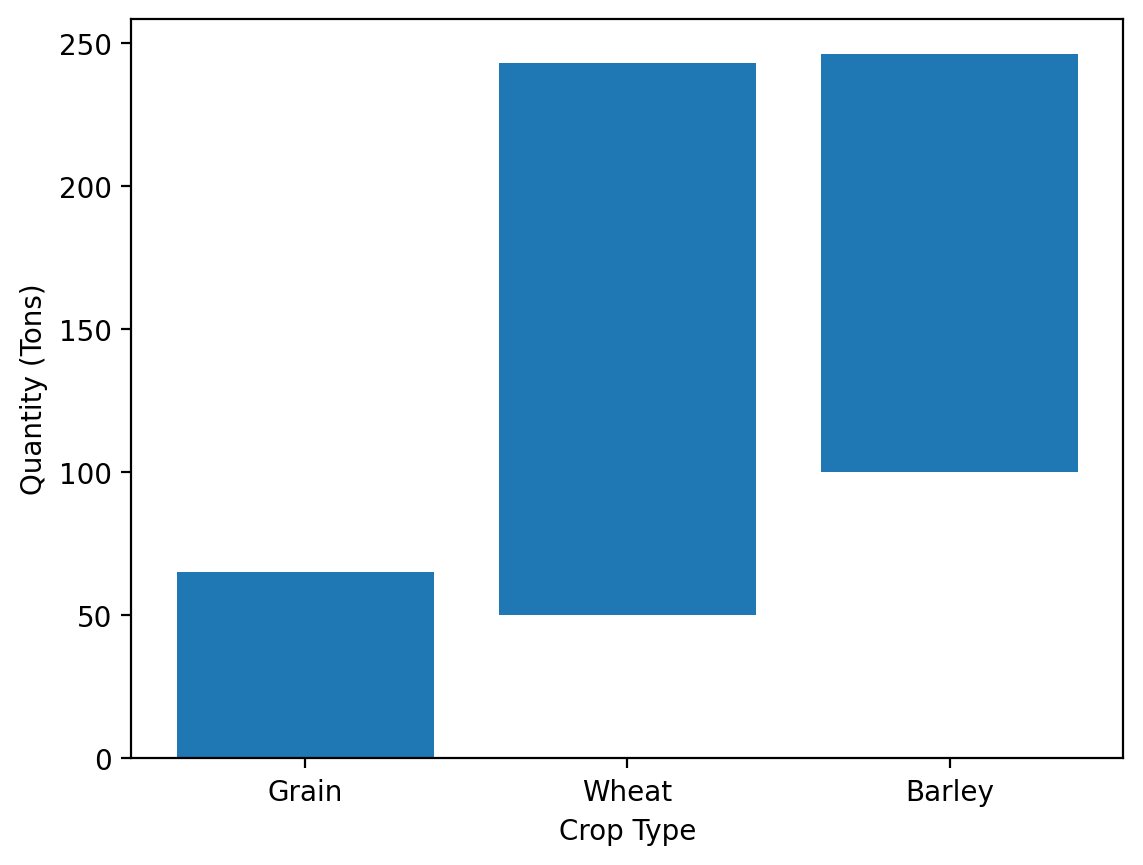

In [6]:
fig, ax = plt.subplots()

bottom = np.array([0, 50, 100])

ax.bar(total.index, height=total.values, bottom=bottom)
ax.set_xlabel("Crop Type")
ax.set_ylabel("Quantity (Tons)")

Grain starts at 0, wheat at 50, and barley at 100. We can use this to make our stacked bar plot by plotting each element by adding it as a new set of bars. Let's start by plotting just one farm instead of the totals and we'll begin with Farm A.

Text(0, 0.5, 'Quantity (Tons)')

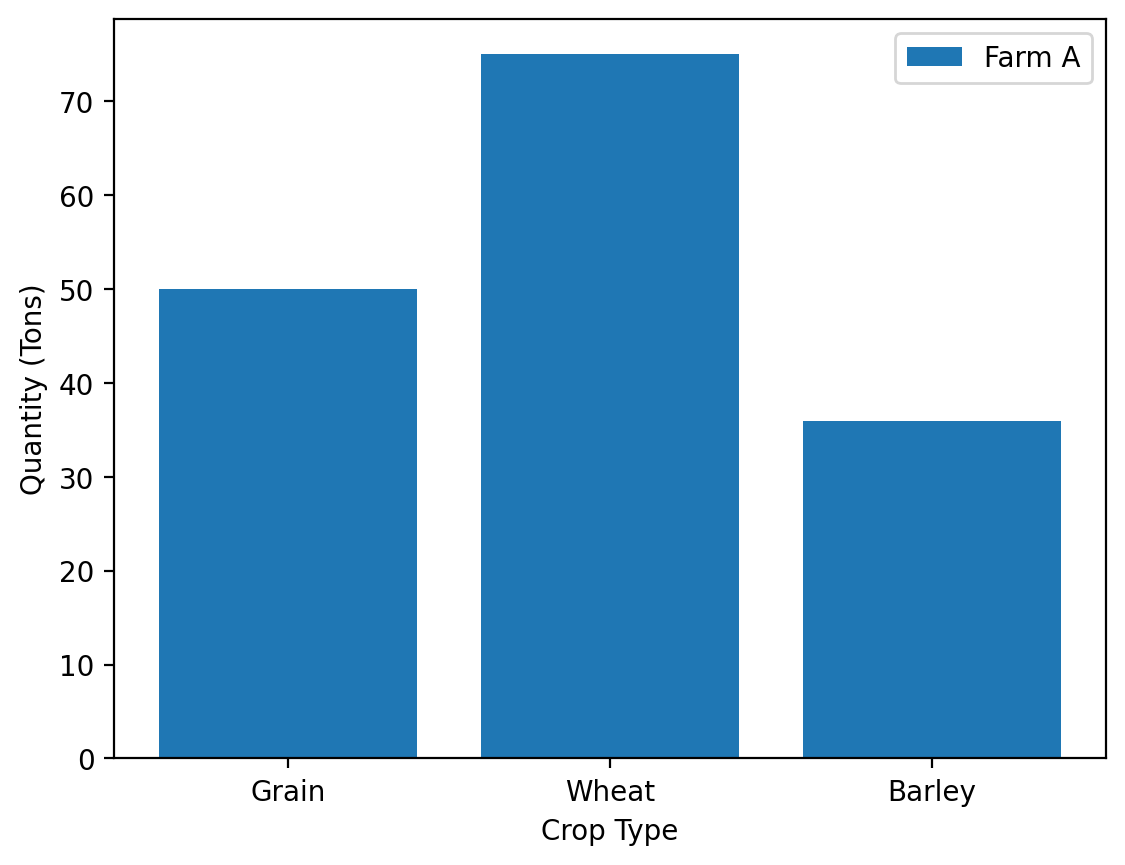

In [7]:
fig, ax = plt.subplots()

ax.bar(farm_data.columns, farm_data.loc["Farm A"].values, label="Farm A")

ax.legend()
ax.set_xlabel("Crop Type")
ax.set_ylabel("Quantity (Tons)")

Now, to create the stacked items, we'll plot each part of the bar on top of these first sets of bars by resetting the baseline each time to the cumulative total of any previously plotted bars. Using this approach, let's iterate through each row of the `farm_data` DataFrame and plot it to make the stacked bar plot:

Text(0, 0.5, 'Quantity (Tons)')

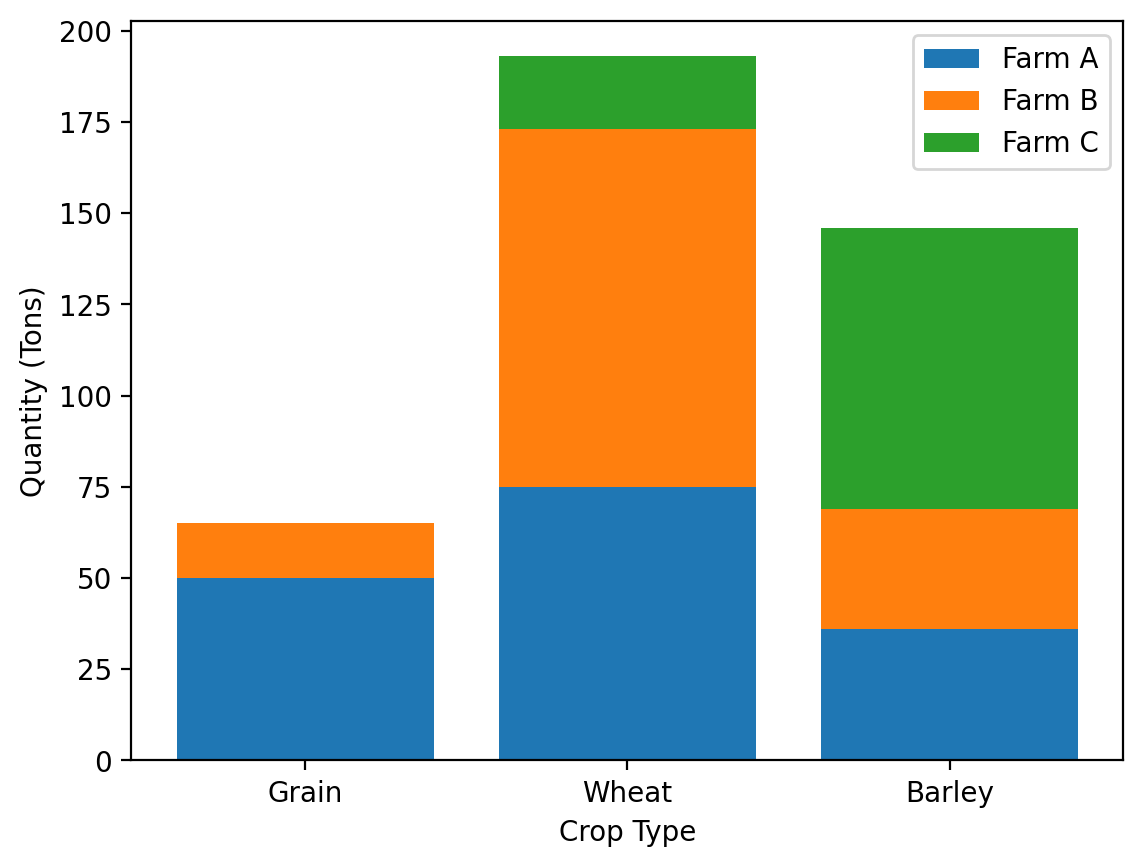

In [8]:
fig, ax = plt.subplots()

bottom = np.zeros(
    3
)  # Stores the current baseline of the bars to set as the baseline for the next set of bars

for (
    farm_name,
    farm_crop_yields,
) in (
    farm_data.iterrows()
):  # Recall that for a DataFrame using the `iterrows()` method allows us to iterate over the rows of the DataFrame
    ax.bar(
        farm_crop_yields.index, farm_crop_yields.values, label=farm_name, bottom=bottom
    )
    # Note that here, farm_crop_yields.index is the farm name, farm_crop_yields.values is the crop yields for the current farm in the loop

    bottom += farm_crop_yields  # Collects the total amounts of grain, wheat, and barley already accounted for and establishes the new baseline for the next farm to stack on the plot.

ax.legend()
ax.set_xlabel("Crop Type")
ax.set_ylabel("Quantity (Tons)")

It can sometimes aid in reading bar plots to add a sliver of whitespace between the components. This can be easily done by setting the `edgecolor` property:

Text(0, 0.5, 'Quantity (Tons)')

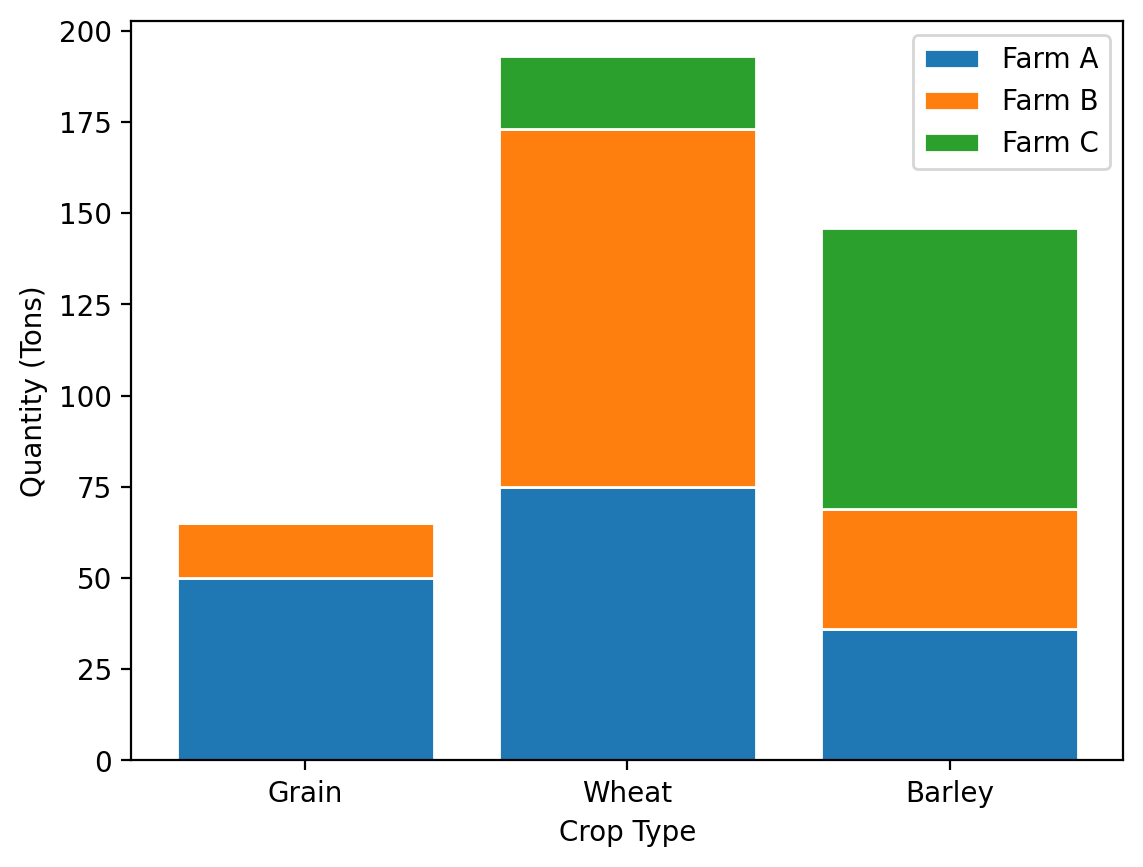

In [9]:
fig, ax = plt.subplots()

bottom = np.zeros(
    3
)  # Stores the current baseline of the bars to set as the baseline for the next set of bars

for (
    farm_name,
    farm_crop_yields,
) in (
    farm_data.iterrows()
):  # Recall that for a DataFrame using the `iterrows()` method allows us to iterate over the rows of the DataFrame
    ax.bar(
        farm_crop_yields.index,
        farm_crop_yields.values,
        label=farm_name,
        bottom=bottom,
        edgecolor="white",
    )
    # Note that here, farm_crop_yields.index is the farm name, farm_crop_yields.values is the crop yields for the current farm in the loop

    bottom += farm_crop_yields  # Collects the total amounts of grain, wheat, and barley already accounted for and establishes the new baseline for the next farm to stack on the plot.

ax.legend()
ax.set_xlabel("Crop Type")
ax.set_ylabel("Quantity (Tons)")

### Grouped bar plots

Grouped bar plots require that we do a small amount of math to get them to work. Let's look at how we do this, then explain how it's made:

Text(0, 0.5, 'Quantity (Tons)')

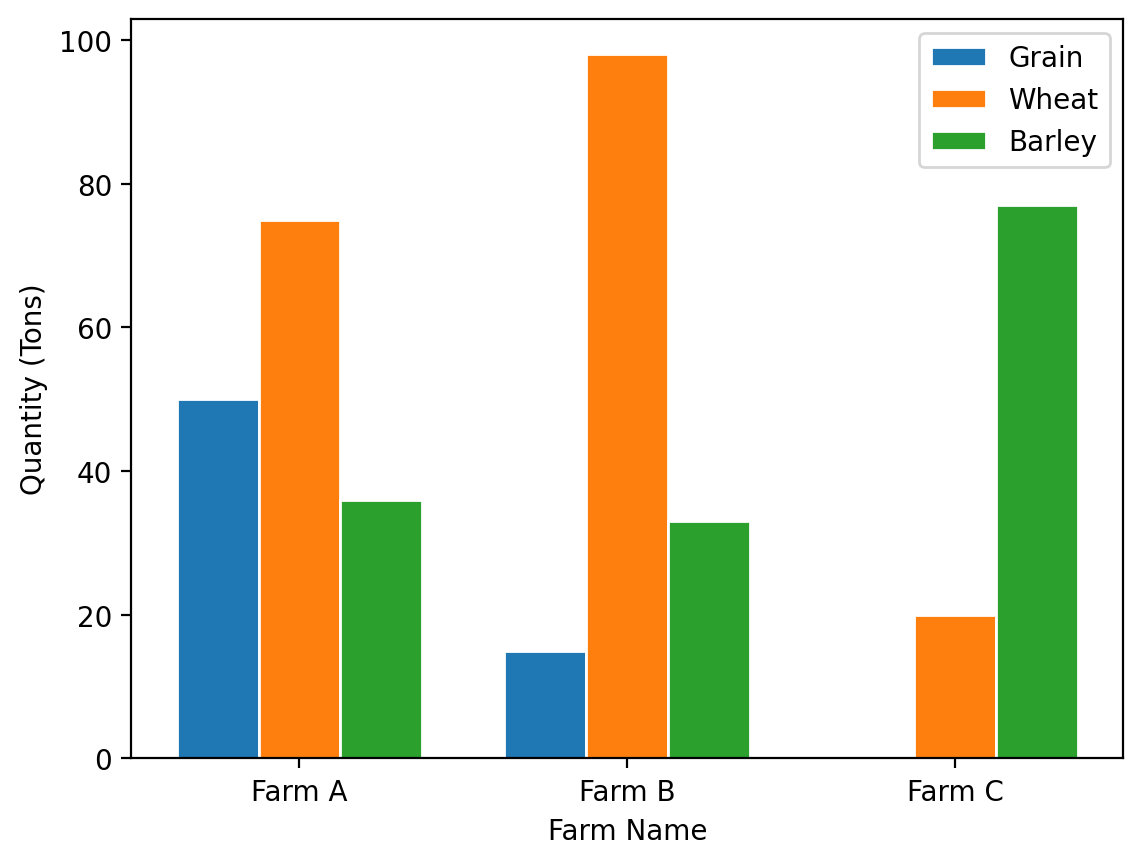

In [11]:
fig, ax = plt.subplots()

num_columns = farm_data.shape[0]  # Number of bars per group
num_rows = farm_data.shape[1]  # Number of groups

x_values = np.arange(num_rows)

bar_width = 1 / (
    num_columns + 1
)  # width of the bars. To ensure a gap between groups, this could be 1 / (N+1) where N is the number of bars per group
column_count = 0  # Count of how many sets of bars have been plotted so far

for crop_name, farm_crop_yields in farm_data.items():
    offset = (
        bar_width * column_count
    )  # Offset from the x axis value for the group to the place where the bar will be centered
    ax.bar(
        x_values + offset,
        farm_crop_yields.values,
        width=bar_width,
        label=crop_name,
        edgecolor="white",
    )  # The edgecolor property adds a small amount of space between the bars for ease of reading
    column_count += 1

tick_locations = (
    x_values + (1 - offset) / 2
)  # Place the ticks at the center of the groups of bars
ax.set_xticks(tick_locations)
ax.set_xticklabels(farm_data.index)

ax.legend()
ax.set_xlabel("Farm Name")
ax.set_ylabel("Quantity (Tons)")

To create these grouped bar plots, we need to tell matplotlib where we want each of the bars to go along the x-axis and spread them out based on how many bars we will plot per group. Let's look at this on an iteration-by-iteration basis to show how this works. There are four key quantities:

1. The width of the bars to plot
2. The iteration that we're currently on, starting at zero and walking through each item in the group (e.g. grain, wheat, barley, in our last example)
3. The offset for where to center the bar along the x axis (assuming a vertical bar plot)
4. The x values of the offset bars. For example, if the x values are [0,1,2] and we include an offset of 0.5, we'll plot the centers of those bars at [0.5, 1.5, 2.5]

The figure below shows step-by-step how these grouped bar plots are created.

![Making a grouped bar chart](img/5.1-grouped-bar.png)

Stacked and grouped bar plots are common tools to use when comparing values and will be a regular tool in your growing toolbox.